# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:red">  Numerical exercises 11: Neural Network Regression</span>

$\textbf{11.1 Linear fit}$

The task of this exercise was to improve the already given neural network in order to obtain a good fit of:

$$f(x) = 2x + 1$$

exploring how the parameters of the neural network affect its ability to fit well.

I've understood that:
- a gaussian noise is necessary, but should not be too high
- the number of epochs should be high, but not too much, because from a certain point the NN stops learning
- the number of training points should be high, the exact number depending on the problem

In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [2]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.1 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

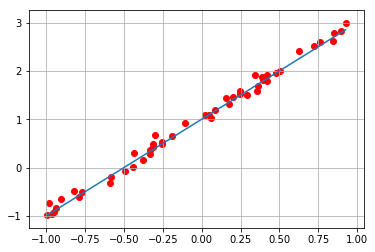

In [3]:
# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

In [4]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

/home/matteo/.conda/envs/intelpython3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [5]:
# get a summary of our composed model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [6]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=40,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 500 samples, validate on 50 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
500/500 [==============================] - 0s 512us/sample - loss: 4.9807 - mean_squared_error: 4.9807 - val_loss: 3.8671 - val_mean_squared_error: 3.8671
Epoch 2/40
500/500 [==============================] - 0s 32us/sample - loss: 3.8104 - mean_squared_error: 3.8104 - val_loss: 3.0042 - val_mean_squared_error: 3.0042
Epoch 3/40
500/500 [==============================] - 0s 47us/sample - loss: 2.9655 - mean_squared_error: 2.9655 - val_loss: 2.3600 - val_mean_squared_error: 2.3600
Epoch 4/40
500/500 [==============================] - 0s 40us/sample - loss: 2.3306 - mean_squared_error: 2.3306 - val_loss: 1.8712 - val_mean_squared_error: 1.8712
Epoch 5/40
500/500 [==============================] - 0s 54us/sample - loss: 1.8480 - mean_squared_error: 1.8480 - val_loss: 1.4907 - val_mean_squared_error: 1.4907
Epoch 6/40
500/500 [==============================] - 0s 43us/sample - loss: 1.47

In [7]:
# return weights
model.get_weights()

[array([[1.9635195]], dtype=float32), array([0.98846656], dtype=float32)]

In [8]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test mse:', score[1])

50/50 [==============================] - 0s 137us/sample - loss: 0.0115 - mean_squared_error: 0.0115

Test loss: 0.011542050912976266
Test mse: 0.011542051


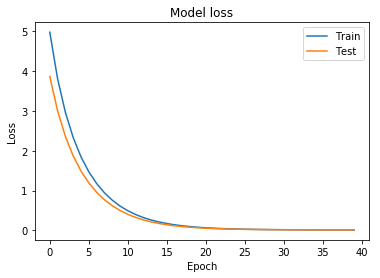

In [9]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

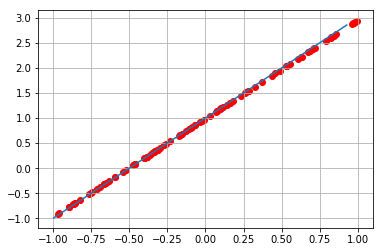

In [10]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

$\textbf{11.2 Polinomial fit}$

The task of this exercise was to improve the NN constructed before in order to fit the function:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

The following NN I've constructed fits well the given function almost everywhere, except in the neighbourhood of x=1 where the function a varies quickly; this change is too rapid to be understood by the NN, which I expect not to be able to generalize well for x>1, but I'll expect a good generalization for x<0.

In [11]:
# target parameters of f(x) = a*x^3 + b*x^2 +c*x +d
a = 3
b = -2
c = -3
d = 4

In [12]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = a*x_valid**3 + b*x_valid**2 + c*x_valid + d # ideal (target) polinomial function

sigma = 0.1 # noise standard deviation
y_train = np.random.normal(a*x_train**3 + b*x_train**2 + c*x_train + d, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a*x_valid**3 + b*x_valid**2 + c*x_valid + d, sigma)

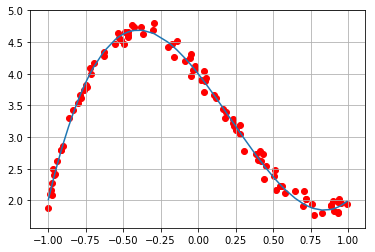

In [13]:
# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

In [14]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(1,), activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [15]:
# get a summary of our composed model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 274
Trainable params: 274
Non-trainable params: 0
_________________________________________________________________


In [16]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 1000 samples, validate on 100 samples
Epoch 1/50
1000/1000 [==============================] - 0s 445us/sample - loss: 2.8330 - mean_squared_error: 2.8330 - val_loss: 0.6717 - val_mean_squared_error: 0.6717
Epoch 2/50
1000/1000 [==============================] - 0s 37us/sample - loss: 0.4708 - mean_squared_error: 0.4708 - val_loss: 0.4851 - val_mean_squared_error: 0.4851
Epoch 3/50
1000/1000 [==============================] - 0s 38us/sample - loss: 0.3452 - mean_squared_error: 0.3452 - val_loss: 0.5096 - val_mean_squared_error: 0.5096
Epoch 4/50
1000/1000 [==============================] - 0s 44us/sample - loss: 0.3334 - mean_squared_error: 0.3334 - val_loss: 0.4971 - val_mean_squared_error: 0.4971
Epoch 5/50
1000/1000 [==============================] - 0s 40us/sample - loss: 0.3256 - mean_squared_error: 0.3256 - val_loss: 0.5002 - val_mean_squared_error: 0.5002
Epoch 6/50
1000/1000 [==============================] - 0s 43us/sample - loss: 0.3195 - mean_squared_error: 0.3195 - 

1000/1000 [==============================] - 0s 61us/sample - loss: 0.0187 - mean_squared_error: 0.0187 - val_loss: 0.0194 - val_mean_squared_error: 0.0194
Epoch 50/50
1000/1000 [==============================] - 0s 65us/sample - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0223 - val_mean_squared_error: 0.0223


In [17]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test mse:', score[1])

100/100 [==============================] - 0s 45us/sample - loss: 0.0223 - mean_squared_error: 0.0223

Test loss: 0.022312575168907643
Test mse: 0.022312574


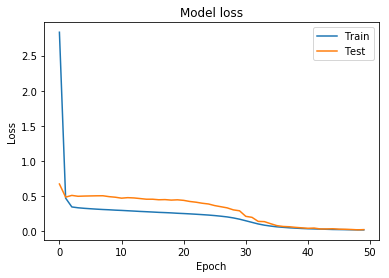

In [18]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

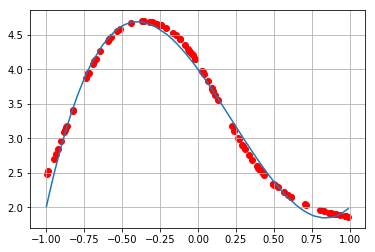

In [19]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted, color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

$\textbf{11.3 2D function fit}$

The task of this exercise was to construct a neural network in order to fit the 2D trigonometric function:

$$f(x,y) = \sin(x^2+y^2)$$

in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Since the function is a two variable real function, I've set a high number of training points, and the arrays passed to the NN are arrays of couples (x,y); thus the first layer of the NN has to be set to have *input_shape*=2.  
I've chosen *tanh* activation functions for all the layers except the last one, where I've set a *sigmoid* activation function, because I've tried with *tanh* in all layers and the NN wasn't able to fit some smooth regions of the function.  
I've tried different number of epochs, and finally decided to set it to 15, because with a higher number of epochs the improvement in the learning phase of the NN was almost zero.

I've plotted in the same 3D graph the theorical two variable function and the training data in the graph below, and in the end I've plotted the theorical function and the fitted one; it can be seen from the graph that the NN has fitted well the 2D function.

In [20]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# generate training inputs

n_train = 100000
n_valid = 5000
np.random.seed(0)
x_train = np.random.uniform(-1.5, 1.5, (n_train, 2))
x_valid = np.random.uniform(-1.5, 1.5, (n_valid, 2))
#x_valid.sort()
y_target = np.sin(x_valid[:,0]**2 + x_valid[:,1]**2) # ideal (target) 2D function

sigma = 0.1 # noise standard deviation
y_train = np.random.normal(np.sin(x_train[:,0]**2 + x_train[:,1]**2), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(np.sin(x_valid[:,0]**2 + x_valid[:,1]**2), sigma)

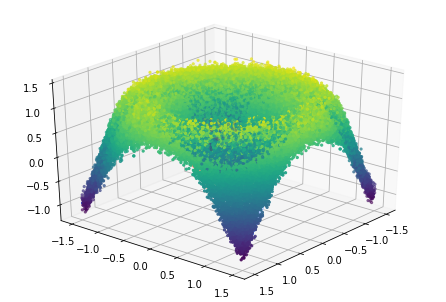

In [21]:
X=np.zeros(n_train)
Y=np.zeros(n_train)

for i in range(0, n_train):
    X[i]=x_train[i,0]
    Y[i]=x_train[i,1]

#X=x_train[:,0]
#Y=x_train[:,1]
Z=y_train

X_valid=np.zeros(n_valid)
Y_valid=np.zeros(n_valid)

for i in range(0,n_valid):
    X_valid[i]=x_valid[i,0]
    Y_valid[i]=x_valid[i,1]
    
X_valid.sort()
Y_valid.sort()

#X_valid=x_valid[:,0]
#Y_valid=x_valid[:,1]
Z_valid=np.zeros(n_valid)
#print(X_valid)
#print(Y_valid)

X_valid, Y_valid = np.meshgrid(X_valid, Y_valid)
Z_valid=np.sin(X_valid**2 + Y_valid**2)
#print(Z_valid)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.plot_surface(X_valid, Y_valid, Z_valid, 
                cmap=cm.coolwarm, 
                linewidth=0, antialiased=False)
ax.view_init(30, 40)

plt.show()

In [22]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(2,), activation='tanh'))
model.add(Dense(15, activation='tanh'))
model.add(Dense(15, activation='tanh'))
model.add(Dense(25, activation='tanh'))
model.add(Dense(25, activation='tanh'))
model.add(Dense(15, activation='tanh'))
model.add(Dense(15, activation='tanh'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [23]:
# get a summary of our composed model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_8 (Dense)              (None, 15)                165       
_________________________________________________________________
dense_9 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_10 (Dense)             (None, 25)                400       
_________________________________________________________________
dense_11 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_12 (Dense)             (None, 15)                390       
_________________________________________________________________
dense_13 (Dense)             (None, 15)                240       
__________

In [24]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=15,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 100000 samples, validate on 5000 samples
Epoch 1/15
100000/100000 [==============================] - 5s 46us/sample - loss: 0.1594 - mean_squared_error: 0.1594 - val_loss: 0.1604 - val_mean_squared_error: 0.1604
Epoch 2/15
100000/100000 [==============================] - 4s 42us/sample - loss: 0.1549 - mean_squared_error: 0.1549 - val_loss: 0.1550 - val_mean_squared_error: 0.1550
Epoch 3/15
100000/100000 [==============================] - 4s 38us/sample - loss: 0.1447 - mean_squared_error: 0.1447 - val_loss: 0.1450 - val_mean_squared_error: 0.1450
Epoch 4/15
100000/100000 [==============================] - 4s 36us/sample - loss: 0.1343 - mean_squared_error: 0.1343 - val_loss: 0.1288 - val_mean_squared_error: 0.1288
Epoch 5/15
100000/100000 [==============================] - 4s 36us/sample - loss: 0.0888 - mean_squared_error: 0.0888 - val_loss: 0.0590 - val_mean_squared_error: 0.0590
Epoch 6/15
100000/100000 [==============================] - 4s 38us/sample - loss: 0.0430 - mea

In [25]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test mse:', score[1])

5000/5000 [==============================] - 0s 21us/sample - loss: 0.0112 - mean_squared_error: 0.0112

Test loss: 0.011169299802184104
Test mse: 0.0111693


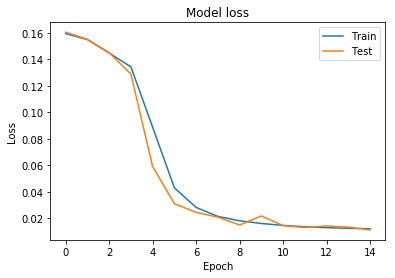

In [26]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

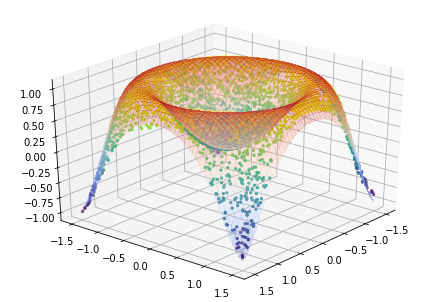

In [27]:
n_predict = 5000
x_predicted = np.random.uniform(-1.5, 1.5, (n_predict,2))
y_predicted = model.predict(x_predicted)
#plt.scatter(x_predicted, y_predicted, color='r')
#plt.plot(x_valid, y_target)
#plt.grid(True)
#plt.show()

X=np.zeros(n_predict)
Y=np.zeros(n_predict)
Z=np.zeros(n_predict)

for i in range(0, n_predict):
    X[i]=x_predicted[i,0]
    Y[i]=x_predicted[i,1]
    Z[i]=y_predicted[i,0]
#X=x_train[:,0]
#Y=x_train[:,1]


X_valid=np.zeros(n_valid)
Y_valid=np.zeros(n_valid)

for i in range(0,n_valid):
    X_valid[i]=x_valid[i,0]
    Y_valid[i]=x_valid[i,1]
    
X_valid.sort()
Y_valid.sort()

#X_valid=x_valid[:,0]
#Y_valid=x_valid[:,1]
Z_valid=np.zeros(n_valid)
#print(X_valid)
#print(Y_valid)

X_valid, Y_valid = np.meshgrid(X_valid, Y_valid)
Z_valid=np.sin(X_valid**2 + Y_valid**2)
#print(Z_valid)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X_valid, Y_valid, Z_valid, 
             cmap=cm.coolwarm, 
              linewidth=0, antialiased=False, alpha=0.2)
ax.scatter(X, Y, Z, c=Z, marker='.')

ax.view_init(30, 40)

plt.show()

In [28]:
#save_model_path ='Saved/2D_function_fit.mod'
#model.save(filepath=save_model_path,include_optimizer=True)